# 5002 Assignment 4

ZHANG Juntao - 20908272

### 1. A sphere on a cube

In [1]:
import numpy as np
import matplotlib.pyplot as plt

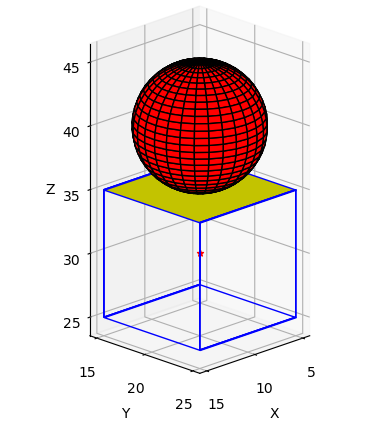

In [2]:
plt.figure()
ax = plt.axes(projection='3d',proj_type='ortho')

# sphere
grid=30
u = np.linspace(0, 2 * np.pi, grid ,endpoint=True)
v = np.linspace(0, np.pi, grid ,endpoint=True)

XX=np.zeros([grid, grid],float)
YY=np.zeros([grid, grid],float)
ZZ=np.zeros([grid, grid],float)

nnu=-1
for nu in u:
    nnu=nnu+1
    nnv=-1
    for nv in v:
        nnv=nnv+1
        XX[nnu,nnv]=10+5*np.sin(nv)*np.sin(nu)
        YY[nnu,nnv]=20+5*np.sin(nv)*np.cos(nu)
        ZZ[nnu,nnv]=40+5*np.cos(nv)

ax.plot_surface(XX, YY, ZZ, color='r',edgecolor='k',shade=False,zorder=10)

# center signal
center_cube=[10,20,30]
ax.scatter(center_cube[0],center_cube[1],center_cube[2],c='r',marker='*')

# cube
X = np.linspace(5, 15, 2)
Y = np.linspace(15,25, 2)
Z = np.linspace(25,35, 2)
X, Y = np.meshgrid(X, Y)
Z_up = 35*np.ones(X.shape)
Z_low = 25*np.ones(X.shape)
ax.plot_surface(X, Y, Z_up, color='yellow',edgecolor='blue',linewidth=1.0,zorder=5)
ax.plot_surface(X, Y, Z_low, color='None',edgecolor='blue',linewidth=1.0,zorder=5)

X, Z = np.meshgrid(X, Z)
Y_up = 25*np.ones(X.shape)
Y_low = 15*np.ones(X.shape)
ax.plot_surface(X, Y_up, Z, color='None',edgecolor='blue',linewidth=1.0,zorder=5)
ax.plot_surface(X, Y_low, Z, color='None',edgecolor='blue',linewidth=1.0,zorder=5)

ax.set_box_aspect([1,1,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.linspace(5,15,3))
ax.set_yticks(np.linspace(15,25,3))
ax.set_zticks(np.linspace(25,45,5))

ax.view_init(20, 45)
plt.draw()

### 2. Taubin’s heart equation

In [3]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import marching_cubes

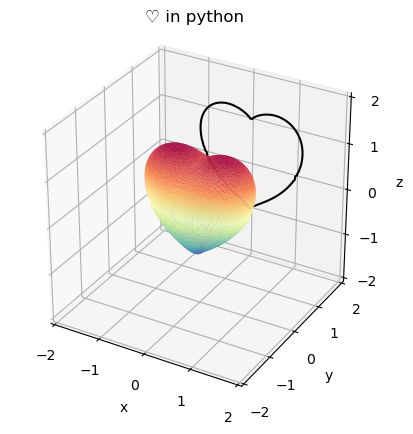

In [4]:
def heart(x, y, z):
    h = np.zeros((len(x), len(y), len(z)))
    for i in range(len(x)):
        for j in range(len(y)):
            for k in range(len(z)):
                h[i, j, k]=(x[i]**2+9/4*y[j]**2+z[k]**2-1)**3-x[i]**2*z[k]**3-9/80*y[j]**2*z[k]**3
    return h

    
n = 100
lims = [-2, 2]

x = np.linspace(lims[0], lims[1], n)
y = np.linspace(lims[0], lims[1], n)
z = np.linspace(lims[0], lims[1], n)
H = heart(x, y, z)

verts, faces = marching_cubes(H, level=0)[:2]
coords=verts

verts_floor=np.floor(verts).astype(int)
verts_ceil=np.ceil(verts).astype(int)
coords[:,0]=y[verts_floor[:,0]]*(1-verts[:,0]+verts_floor[:,0])+y[verts_ceil[:,0]]*(verts[:,0]-verts_floor[:,0])
coords[:,1]=x[verts_floor[:,1]]*(1-verts[:,1]+verts_floor[:,1])+x[verts_ceil[:,1]]*(verts[:,1]-verts_floor[:,1])
coords[:,2]=z[verts_floor[:,2]]*(1-verts[:,2]+verts_floor[:,2])+z[verts_ceil[:,2]]*(verts[:,2]-verts_floor[:,2])

fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(coords[:, 0], coords[:, 1], faces, coords[:, 2], cmap='Spectral_r')

ax.set_title(u'\u2661' + ' in python')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(-2, 2) 
ax.axes.set_ylim3d(-2, 2) 
ax.axes.set_zlim3d(-2, 2) 
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

cross=heart(x,[0],z).reshape((100,100))
xx = np.tile(x, (100,1)).T
zz = np.tile(y, (100,1))
ax.contour(xx,cross,zz, zdir='y',offset=2,levels=[0],colors=['black'])

ax.set_box_aspect([1,1,1])

### 3. Sine and cosine

In [5]:
# %pip install ffmpeg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

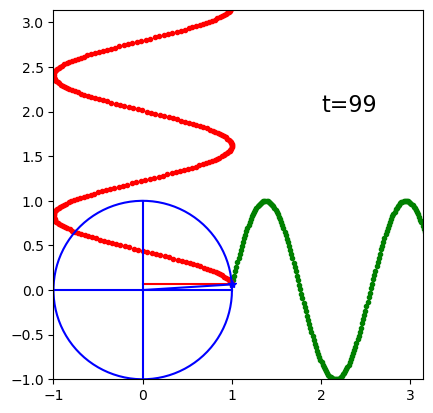

In [6]:
fig, ax = plt.subplots()
plt.axis('square')
ax.set_xlim(-1.0, np.pi)
ax.set_ylim(-1.0, np.pi)
plt.plot([0, 0], [-1, 1], '-', c='b')
plt.plot([-1, 1], [0, 0], '-', c='b')

theta = np.linspace(0, 2*np.pi, 100)  
X = np.array(list(map(lambda x: np.cos(x), theta)))
Y = np.array(list(map(lambda x: np.sin(x), theta)))
plt.plot(X, Y, '-', c='b')

sub_1, = plt.plot([], [], '', c='green', zorder=0)
sub_2, = plt.plot([], [], '', c='red', zorder=0)
sub_3, = plt.plot([], [], '', c='blue', zorder=0)
sub_4, = plt.plot([], [], '*', c='blue', zorder=10)
sub_5, = plt.plot([], [], '.', c='green', zorder=0)
sub_6, = plt.plot([], [], '.', c='red', zorder=0)
text = plt.text(2, 2, '', fontsize=16)

def initial():
    return sub_1, sub_2, sub_3, sub_4, sub_5, sub_6, text

def animation(n):
    A = np.linspace(0, np.pi * 2, 1000)
    angle = -0.01*2*np.pi*n
    sub_8 = np.cos(angle)
    sub_9 = np.sin(angle)
    sub_1.set_data([sub_8, sub_8], [0, sub_9])
    sub_2.set_data([0, sub_8], [sub_9, sub_9])
    sub_3.set_data([0, sub_8], [0, sub_9])
    sub_4.set_data(sub_8, sub_9)
    sub_10 = np.linspace(np.cos(angle), np.pi*4+np.cos(angle), 1000)
    sub_11 = np.sin(A*8 + angle)
    sub_5.set_data(sub_10, sub_11)
    sub_12 = np.linspace(np.sin(angle), np.pi*4+np.sin(angle), 1000)
    sub_13 = np.cos(A*8 + angle)
    sub_6.set_data(sub_13, sub_12)
    text.set_text('t=' + str(n))
    return sub_1, sub_2, sub_3, sub_4, sub_5, sub_6, text

ani = FuncAnimation(fig=fig, func=animation, frames=100, init_func=initial, interval=100, blit=True, repeat=True)
ani.save('Q3.mp4',writer='ffmpeg',fps=10) 

### 4. Clock

In [7]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as  patches
import matplotlib.transforms as transforms
from matplotlib import animation 

In [8]:
def initial():
    circle = patches.Circle((0,0),45,fill=False,edgecolor='k',linewidth=1.5)
    for i in range(12):
        x=50*np.cos(np.pi/3-i*np.pi/6)
        y=50*np.sin(np.pi/3-i*np.pi/6)
        ax.text(x,y,f'${i+1}$',fontsize=15,horizontalalignment='center', verticalalignment='center')
        ax.add_patch(circle)
        ax.add_patch(r1)
        ax.add_patch(r2)
    ax.set_aspect('equal')
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
    ax.axis('off')
    
def update(t):
    ts = ax.transData
    coords = ts.transform([0., 0.])
    tr_1 = transforms.Affine2D().rotate_deg_around(coords[0], coords[1], 90-8.64*t)
    tr_2 = transforms.Affine2D().rotate_deg_around(coords[0], coords[1], 90-0.72*t)
    r1.set_transform(ts + tr_1)
    r2.set_transform(ts + tr_2)

fig,ax=plt.subplots()
r1 = patches.Rectangle((-1.5,-1.5), 40, 3, linewidth=1,edgecolor='k', facecolor='k')
r2 = patches.Rectangle((-1.5,-1.5), 30, 3, linewidth=1,edgecolor='k', facecolor='k')

ani = FuncAnimation(fig=fig, init_func=initial, func=update, frames=np.arange(501), interval=20)
plt.close()
writer = animation.writers['ffmpeg'](fps=50, metadata=dict(artist='Me'), bitrate=1800)
ani.save('Q4.mp4',writer=writer)